In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
cd '/content/drive/MyDrive/Hong/'

/content/drive/MyDrive/Hong


In [3]:
ls

 clean_top_insta_influencers.csv  'EDA + Model .ipynb'   Photo/   top_insta_influencers_data.csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
pip install seaborn --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 7.8 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [6]:
df=pd.read_csv('top_insta_influencers_data.csv')

In [7]:
df.head()

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States


In [8]:
df.shape

(200, 10)

In [9]:
df.dtypes

rank                  int64
channel_info         object
influence_score       int64
posts                object
followers            object
avg_likes            object
60_day_eng_rate      object
new_post_avg_like    object
total_likes          object
country              object
dtype: object

In [10]:
df["posts"]= df["posts"].str[:-1]
df["followers"]= df["followers"].str[:-1]
df["avg_likes"]= df["avg_likes"].str[:-1]
df["60_day_eng_rate"]= df["60_day_eng_rate"].str[:-1]
df["new_post_avg_like"]= df["new_post_avg_like"].str[:-1]
df["total_likes"]= df["total_likes"].str[:-1]

In [11]:
df["posts"]= pd.to_numeric(df["posts"],errors='coerce')
df["followers"]= pd.to_numeric(df["followers"],errors='coerce')
df["avg_likes"]= pd.to_numeric(df["avg_likes"],errors='coerce')
df["60_day_eng_rate"]= pd.to_numeric(df["60_day_eng_rate"],errors='coerce')
df["new_post_avg_like"]= pd.to_numeric(df["new_post_avg_like"],errors='coerce')
df["total_likes"]= pd.to_numeric(df["total_likes"],errors='coerce')

In [12]:
df["posts(k)"]= df["posts"]
df["followers(m)"]= df["followers"]
df["avg_likes(m)"]= df["avg_likes"]
df["new_post_avg_like(m)"]= df["new_post_avg_like"]
df["total_likes(m)"]= df["total_likes"]*1000

In [13]:
df.head()

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country,posts(k),followers(m),avg_likes(m),new_post_avg_like(m),total_likes(m)
0,1,cristiano,92,3.30,475.8,8.7,1.39,6.5,29.0,Spain,3.30,475.8,8.7,6.5,29000.0
1,2,kyliejenner,91,6.90,366.2,8.3,1.62,5.9,57.4,United States,6.90,366.2,8.3,5.9,57400.0
2,3,leomessi,90,0.89,357.3,6.8,1.24,4.4,6.0,NaN,0.89,357.3,6.8,4.4,6000.0
3,4,selenagomez,93,1.80,342.7,6.2,0.97,3.3,11.5,United States,1.80,342.7,6.2,3.3,11500.0
4,5,therock,91,6.80,334.1,1.9,0.20,665.3,12.5,United States,6.80,334.1,1.9,665.3,12500.0


In [14]:
df.isnull().sum()

rank                     0
channel_info             0
influence_score          0
posts                    0
followers                0
avg_likes                0
60_day_eng_rate          1
new_post_avg_like        8
total_likes              0
country                 62
posts(k)                 0
followers(m)             0
avg_likes(m)             0
new_post_avg_like(m)     8
total_likes(m)           0
dtype: int64

In [15]:
df['country'].fillna('Other', inplace=True)

In [17]:
clean_df = df[["rank",'channel_info','influence_score','posts(k)','followers(m)','avg_likes(m)','60_day_eng_rate','new_post_avg_like(m)','total_likes(m)','country']]
clean_df.head()

,rank,channel_info,influence_score,posts(k),followers(m),avg_likes(m),60_day_eng_rate,new_post_avg_like(m),total_likes(m),country
0,1,cristiano,92,3.30,475.8,8.7,1.39,6.5,29000.0,Spain
1,2,kyliejenner,91,6.90,366.2,8.3,1.62,5.9,57400.0,United States
2,3,leomessi,90,0.89,357.3,6.8,1.24,4.4,6000.0,Other
3,4,selenagomez,93,1.80,342.7,6.2,0.97,3.3,11500.0,United States
4,5,therock,91,6.80,334.1,1.9,0.20,665.3,12500.0,United States


In [18]:
clean_df.to_csv('clean_top_insta_influencers.csv')

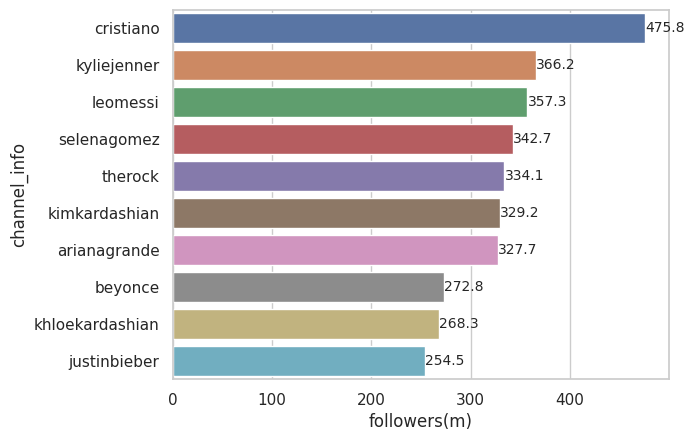

In [19]:
chart_df = clean_df.head(10)
sns.set_theme(style="whitegrid")
ax = sns.barplot(chart_df, x="followers(m)", y="channel_info")
ax.bar_label(ax.containers[0], fontsize=10);

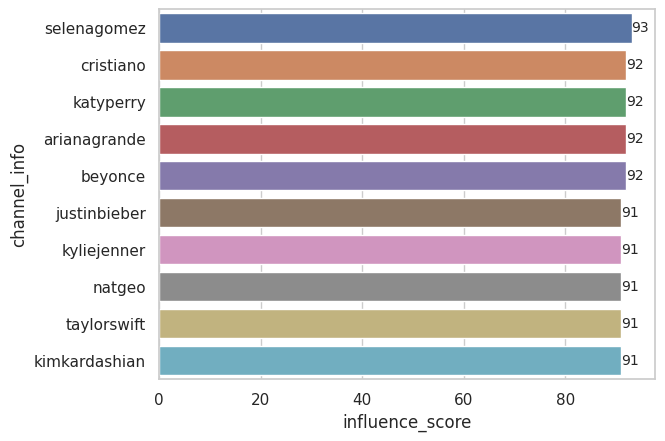

In [20]:
chart_df = clean_df.sort_values(by=["influence_score"], ascending=False)
sns.set_theme(style="whitegrid")
ax = sns.barplot(chart_df.head(10), x="influence_score", y="channel_info")
ax.bar_label(ax.containers[0], fontsize=10);

<Axes: xlabel='total_likes(m)', ylabel='country'>

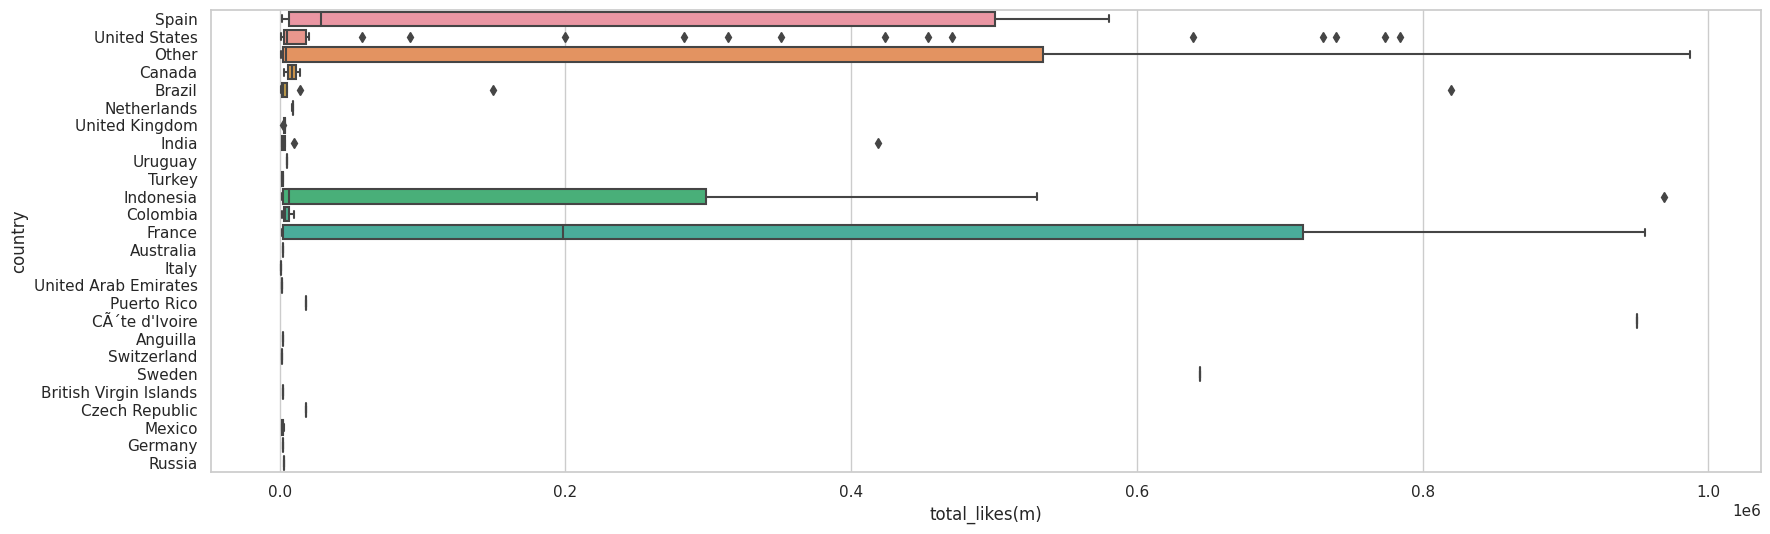

In [21]:
plt.figure(figsize=(20, 6))
sns.boxplot(data=clean_df, x="total_likes(m)", y="country")

<ipython-input-22-2f9b9d103f45>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_likes_country = clean_df.groupby(['country'],as_index=False).mean()


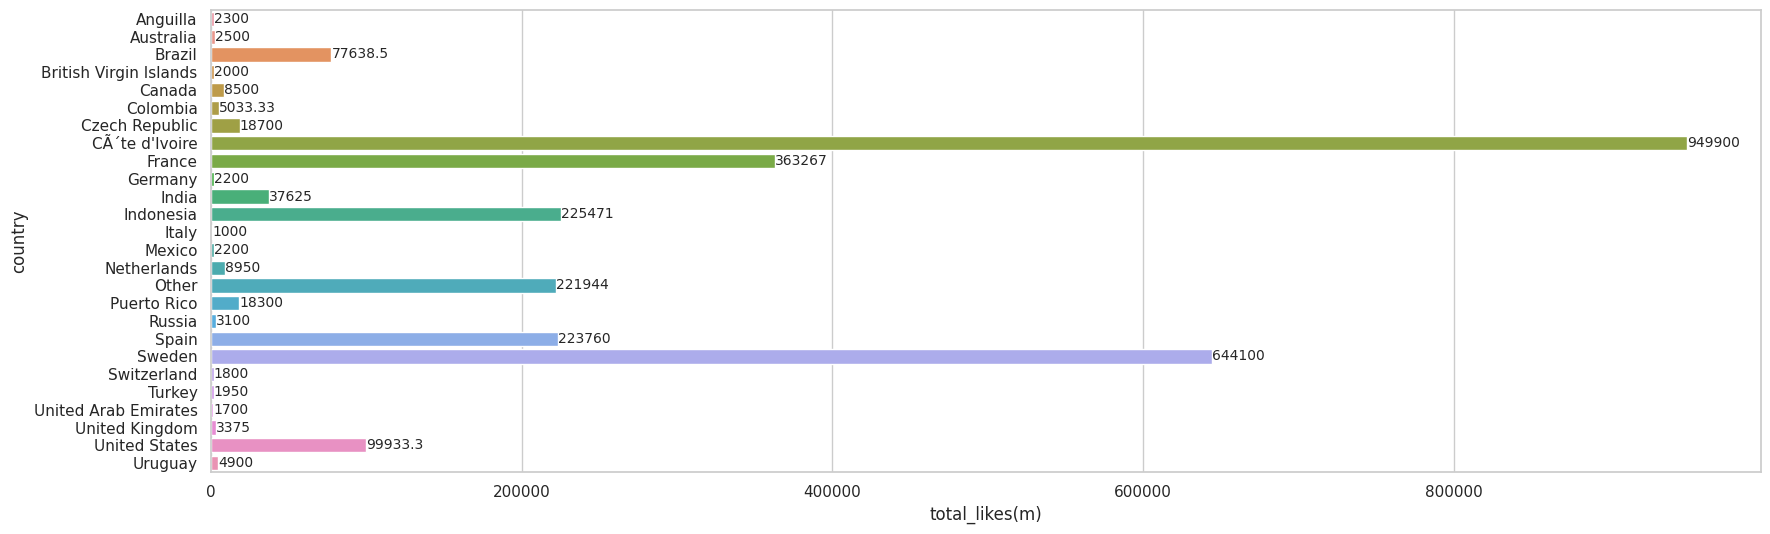

In [22]:
avg_likes_country = clean_df.groupby(['country'],as_index=False).mean()
plt.figure(figsize=(20, 6))
ax = sns.barplot(data=avg_likes_country, x="total_likes(m)", y="country")
ax.bar_label(ax.containers[0], fontsize=10);

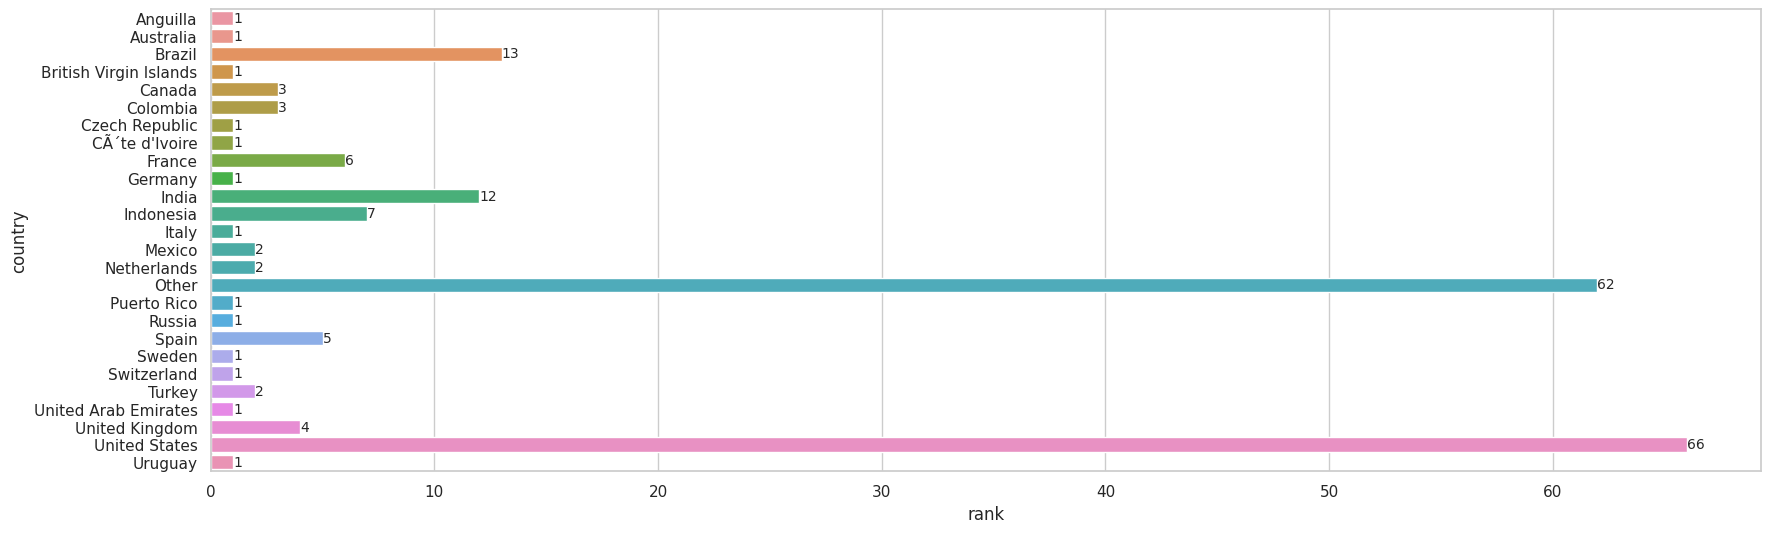

In [23]:
no_inf_country = clean_df.groupby("country",as_index= False).count()
plt.figure(figsize=(20, 6))
ax = sns.barplot(data=no_inf_country, x="rank", y="country")
ax.bar_label(ax.containers[0], fontsize=10);

<ipython-input-24-86e2cdb93080>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_inf_country['percentage(%)'] = 0
<ipython-input-24-86e2cdb93080>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_inf_country['percentage(%)'] = (no_inf_country['rank']/len(clean_df))*100


([<matplotlib.patches.Wedge at 0x790097fdb5e0>,
 [Text(1.099864295735893, 0.017278048656840017, 'Anguilla'),
  Text(1.098778862512746, 0.05181709462326203, 'Australia'),
  Text(1.0610131628853108, 0.29026034552468416, 'Brazil'),
  Text(0.9721422017118516, 0.51472277941707, 'British Virgin Islands'),
  Text(0.9379041912155436, 0.5747484041737891, 'Canada'),
  Text(0.8796531377080374, 0.6604622300483236, 'Colombia'),
  Text(0.8364465776274876, 0.7143928350531404, 'Czech Republic'),
  Text(0.8135942210249916, 0.7403137466741634, "CÃ´te d'Ivoire"),
  Text(0.727443072328198, 0.8251221585448498, 'France'),
  Text(0.6325058017885571, 0.8999646719198564, 'Germany'),
  Text(0.43686271183472813, 1.0095300743456865, 'India'),
  Text(0.12070778109979041, 1.0933570467061369, 'Indonesia'),
  Text(-0.01727801004056712, 1.0998642963425254, 'Italy'),
  Text(-0.0690695313956241, 1.0978294037931344, 'Mexico'),
  Text(-0.13786651553891577, 1.0913261766736644, 'Netherlands'),
  Text(-0.9953097431322409, 0.

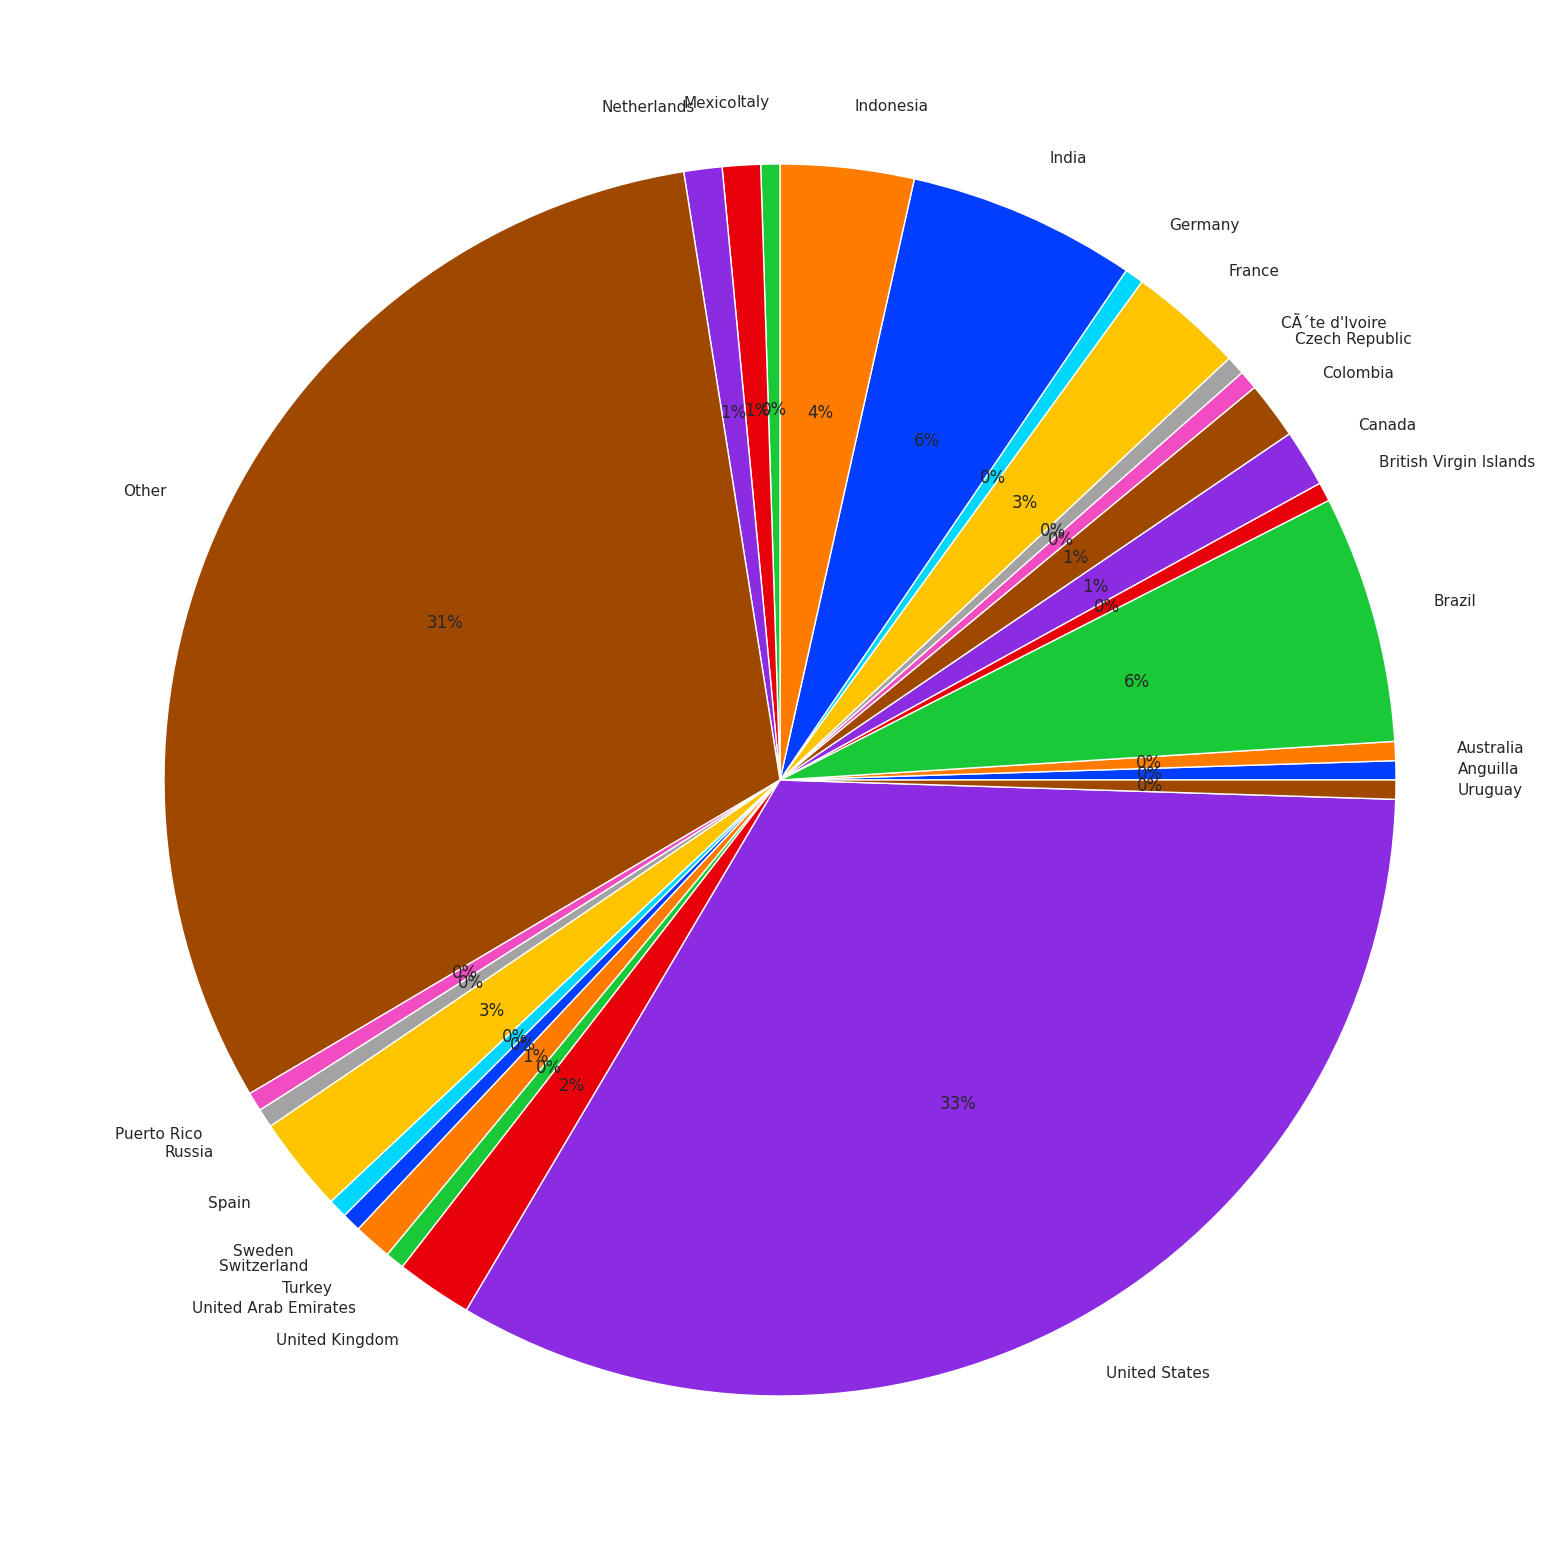

In [24]:
no_inf_country = no_inf_country[["country",'rank']]
no_inf_country['percentage(%)'] = 0
no_inf_country['percentage(%)'] = (no_inf_country['rank']/len(clean_df))*100
percent = no_inf_country['percentage(%)'].to_numpy()
country = no_inf_country['country'].to_numpy()
palette_color = sns.color_palette('bright')
plt.figure(figsize=(20, 20))
plt.pie(percent, labels=country, colors=palette_color, autopct='%.0f%%')

In [25]:
clean_df.head()

,rank,channel_info,influence_score,posts(k),followers(m),avg_likes(m),60_day_eng_rate,new_post_avg_like(m),total_likes(m),country
0,1,cristiano,92,3.30,475.8,8.7,1.39,6.5,29000.0,Spain
1,2,kyliejenner,91,6.90,366.2,8.3,1.62,5.9,57400.0,United States
2,3,leomessi,90,0.89,357.3,6.8,1.24,4.4,6000.0,Other
3,4,selenagomez,93,1.80,342.7,6.2,0.97,3.3,11500.0,United States
4,5,therock,91,6.80,334.1,1.9,0.20,665.3,12500.0,United States


POST VS Other Columns


<Axes: xlabel='posts(k)', ylabel='influence_score'>

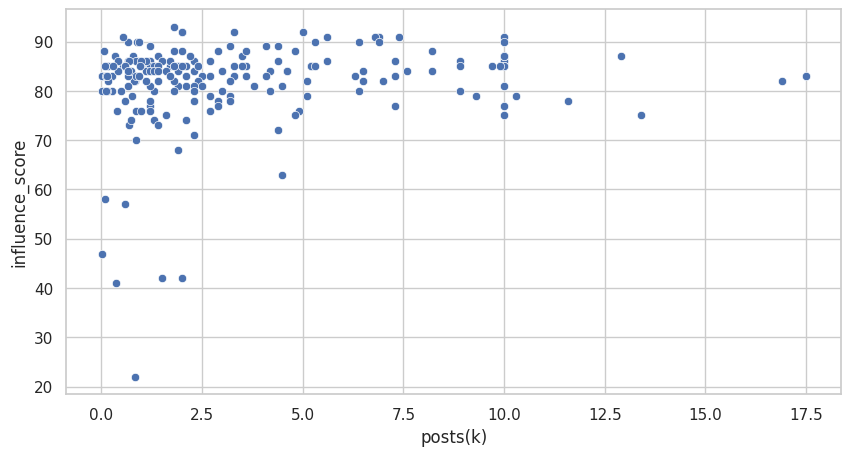

In [26]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=clean_df, x="posts(k)", y="influence_score")

<Axes: xlabel='posts(k)', ylabel='avg_likes(m)'>

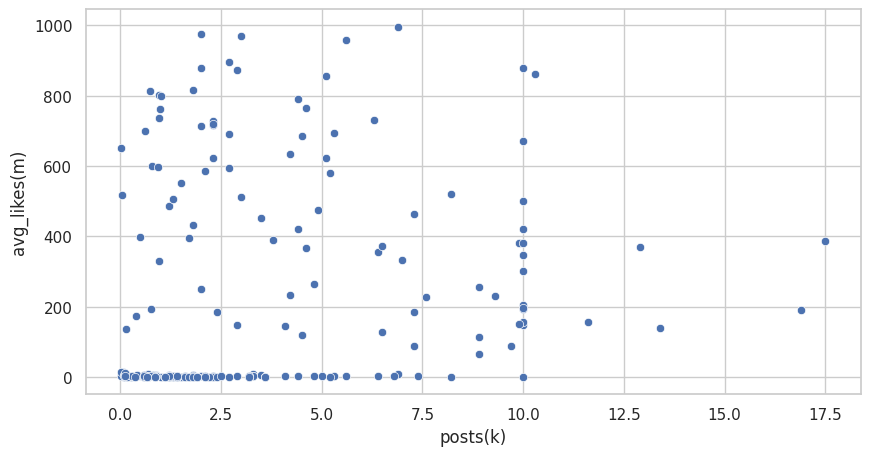

In [27]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=clean_df, x="posts(k)", y="avg_likes(m)")

<Axes: xlabel='posts(k)', ylabel='total_likes(m)'>

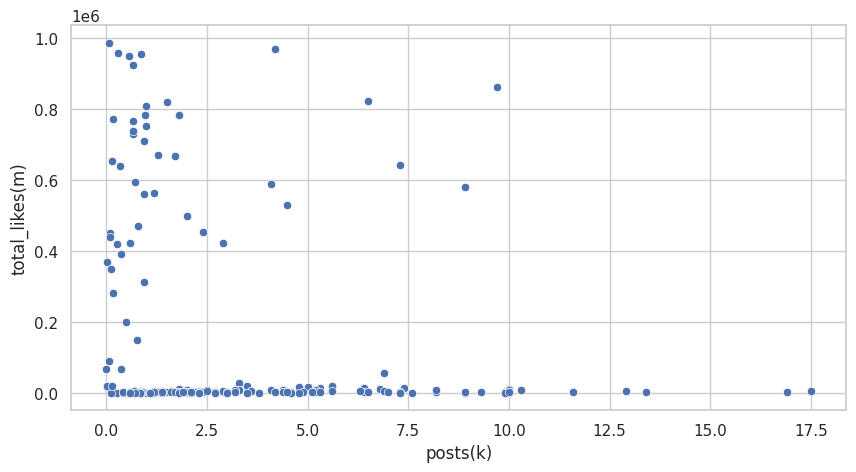

In [29]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=clean_df, x="posts(k)", y="total_likes(m)")

<Axes: xlabel='posts(k)', ylabel='followers(m)'>

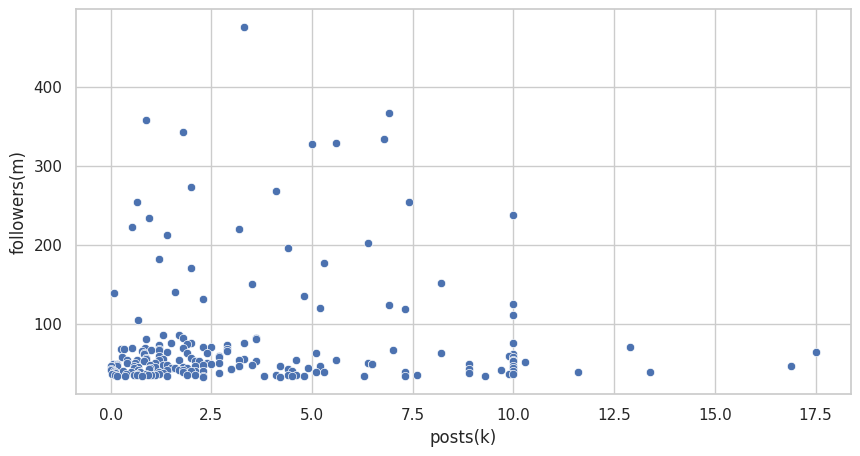

In [30]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=clean_df, x="posts(k)", y="followers(m)")

Follower VS Other Column


<Axes: xlabel='followers(m)', ylabel='influence_score'>

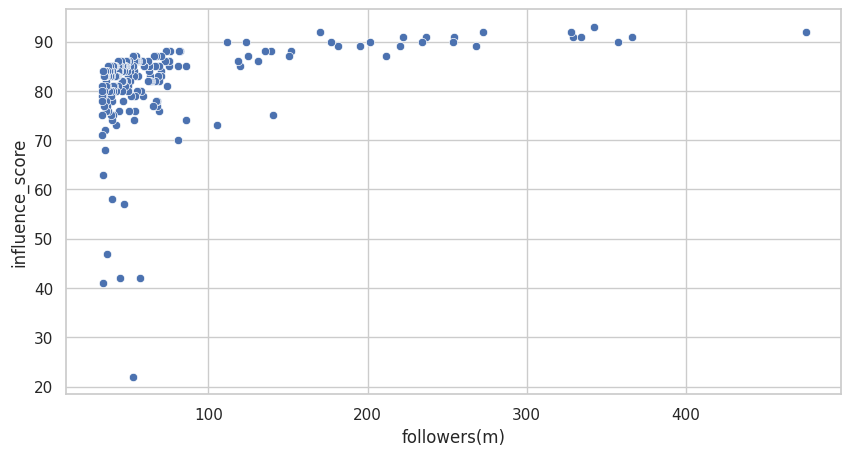

In [31]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=clean_df, x="followers(m)", y="influence_score")

<Axes: xlabel='followers(m)', ylabel='total_likes(m)'>

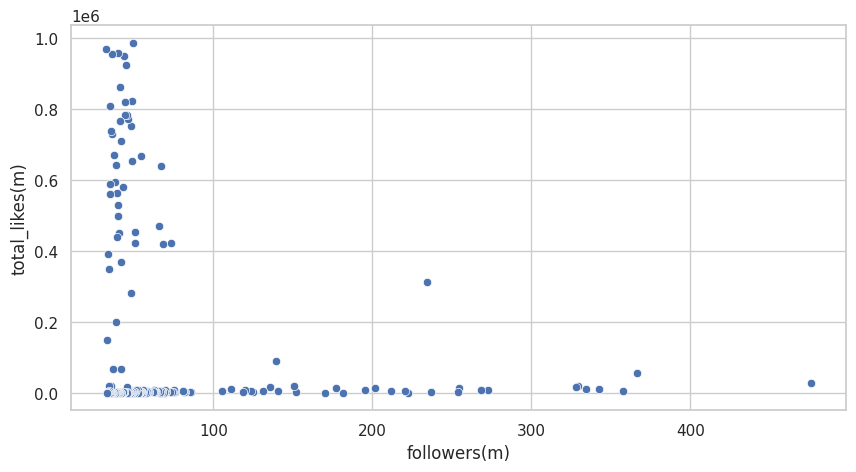

In [32]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=clean_df, x="followers(m)", y="total_likes(m)")

<Axes: xlabel='followers(m)', ylabel='avg_likes(m)'>

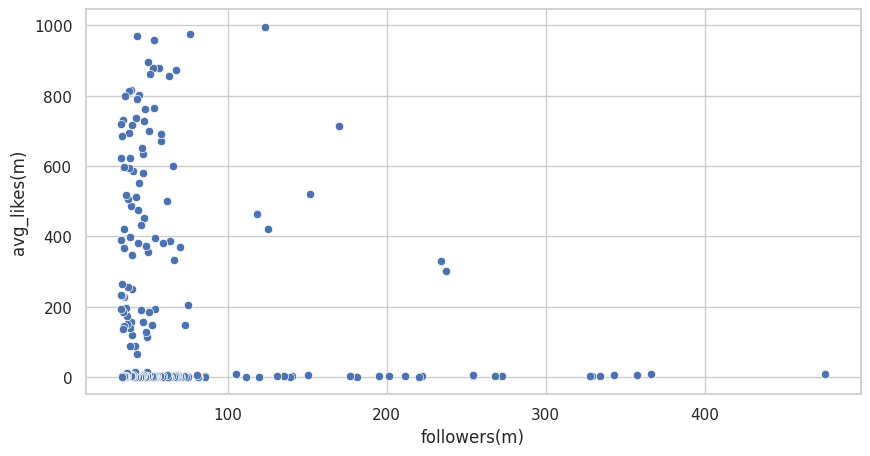

In [33]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=clean_df, x="followers(m)", y="avg_likes(m)")